# Business Case: Walmart - Confidence Interval and CLT

Task:
* Performing EDA to get the insights for purchase behavour between male and female, married and unmarried.
* Using the Central limit theorem to compute the various confidence intervals.
* Giving recomendations on the basis of insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df=pd.read_csv('walmart_data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in data set

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

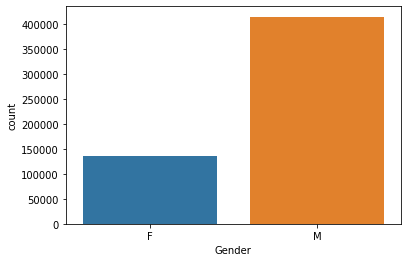

In [8]:
sns.countplot(df['Gender'])

It looks that more male spend on black friday than female or male does payment for there spouse

In [9]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

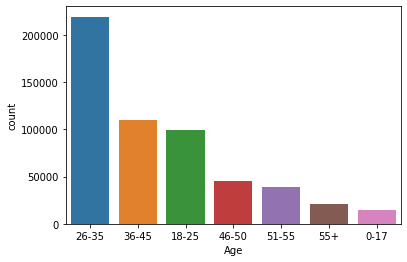

In [10]:
sns.countplot(df['Age'], order = df['Age'].value_counts().index)

People of age group 26-35 are more active in black friday sale than other age group.

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

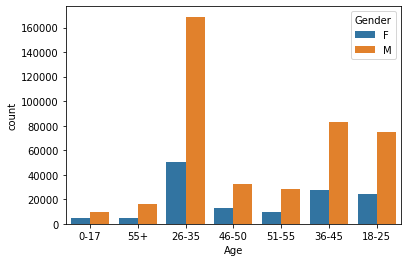

In [11]:
sns.countplot(df['Age'],hue=df['Gender'])

* Males in age group 26-35 are more active than female in black friday sales
* Males of age group 18-25 and 36 to 45 are more active than female of age group 26-35

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

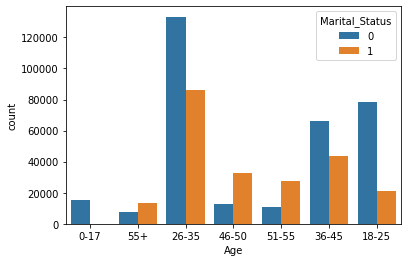

In [12]:
sns.countplot(df['Age'],hue=df['Marital_Status'])

* There are mostly unmarried people who dominate the sales in age range from 18 to 45
* Above the age of 45 mostly married people dominate the sales.
* So from the above two chart we can say that may be males do payment for their spouse

In [13]:
df['Married_Gender']=df.apply(lambda x: (x['Gender'], x['Marital_Status']),axis=1)

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

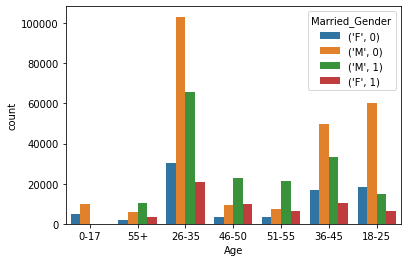

In [14]:
sns.countplot(df['Age'], hue=df['Married_Gender'])

The chart shows that people in age group 25 to 45,

The order of sales is:

unmarried male > married male > unmarried female > married female

In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Married_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(F, 0)"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(F, 0)"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(F, 0)"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(F, 0)"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(M, 0)"


C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

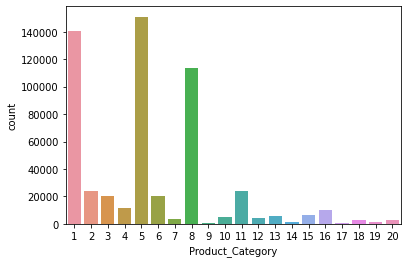

In [16]:
sns.countplot(df['Product_Category'])

It is clearly seen that product 1, 5 and 8 are most demanded product.

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

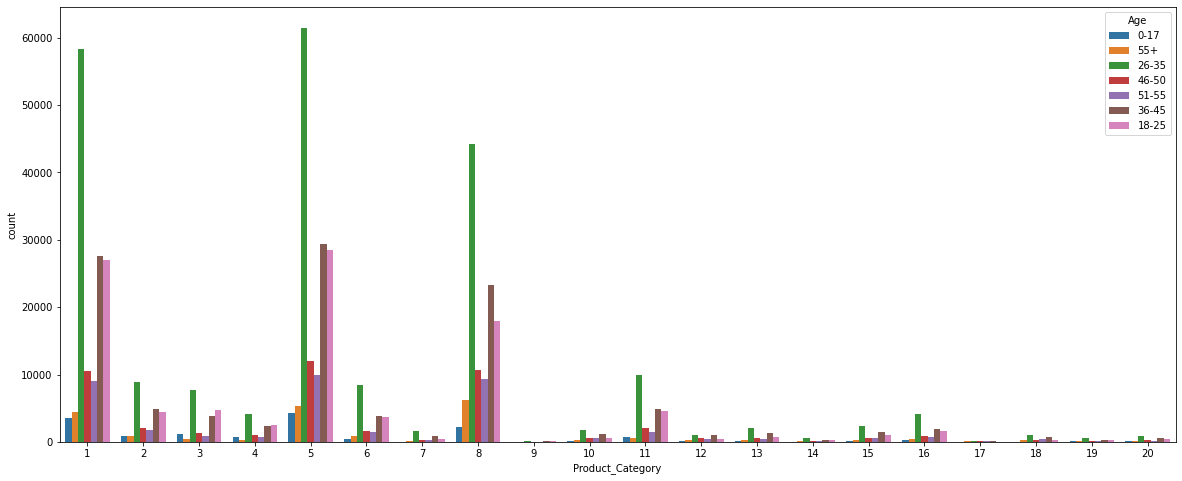

In [17]:
fig = plt.subplots(figsize=(20, 8))
sns.countplot(df['Product_Category'], hue=df['Age'])

Mostly people who buy product 1,5 and 8 belongs to age range 26 to 35.

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

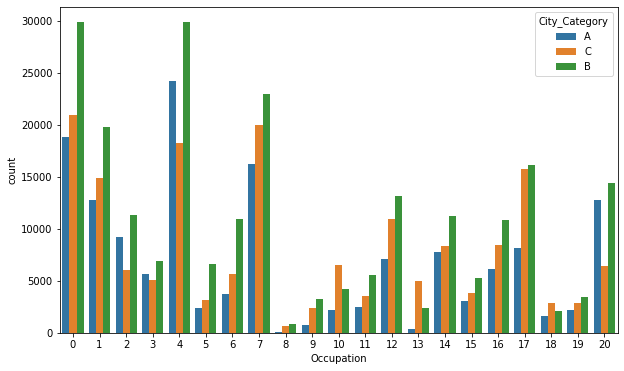

In [18]:
fig = plt.subplots(figsize=(10, 6))
sns.countplot(df['Occupation'], hue=df['City_Category'])

Most of the transactions are made from city B that too is from the people who are employed in occupation category 0 4 and 7 are dominant

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Product_Category'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>]],
      dtype=object)

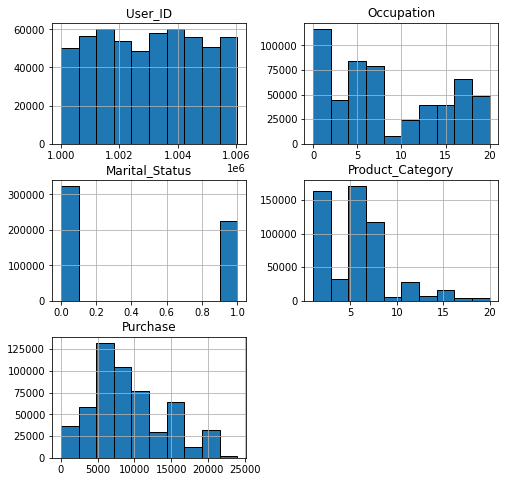

In [19]:
df.hist(figsize=(8,8), edgecolor='black')

<AxesSubplot:title={'center':'Years of staying in the city'}, ylabel='Stay_In_Current_City_Years'>

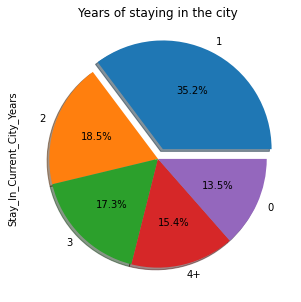

In [20]:
plt.figure(figsize = (10, 5))
df['Stay_In_Current_City_Years'].value_counts().plot.pie(title = "Years of staying in the city", 
                                                                 explode = (0.1, 0, 0, 0, 0), 
                                                                 autopct = "%1.1f%%", shadow = True)

people who are living in city for one year are doing more shopping than others

<AxesSubplot:>

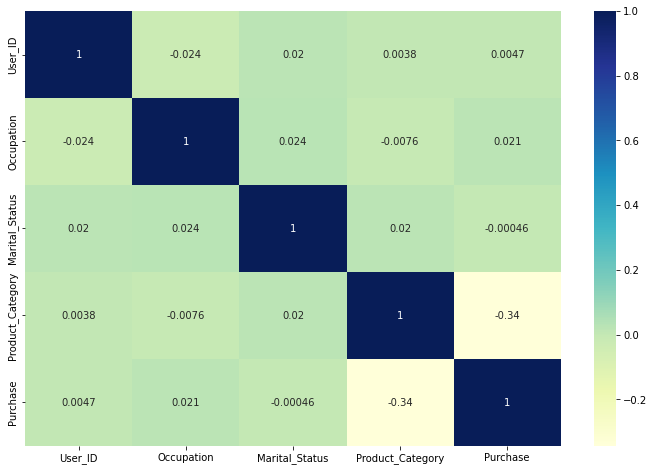

In [21]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap= "YlGnBu", annot=True)

In [22]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [23]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Married_Gender'],
      dtype='object')

In [24]:
def simulate_clt(d, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(d.sample(sample_size).mean())
    pd.Series(means).plot(kind='kde')
    return pd.Series(means)

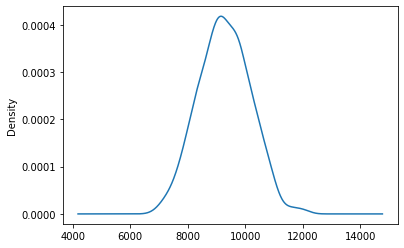

In [25]:
x = simulate_clt(df['Purchase'], sample_size=30, trials=1000)

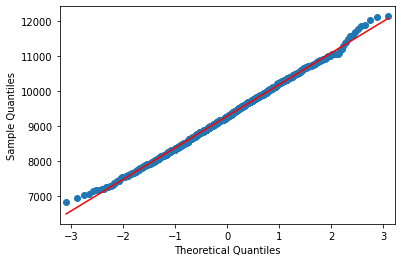

In [26]:
sm.qqplot(x, dist=stats.norm, line='s');

# Confidence Interval for all people

In [27]:
def confidence_interval(x,p):
    mean = x.mean()
    s = x.std()
    ci=round(p*(s/(30**0.5)),2)
    a=[round(mean-ci),round(mean+ci)]
    return a

Case 1: 90% confidence interval

In [28]:
print(confidence_interval(x,1.65))

[9006, 9550]


So, 90% of people spend in range between 9013 to 9563

Case 2: 95% confidence interval

In [29]:
print(confidence_interval(x,1.96))

[8955, 9601]


So, 95% of people spend in range between 8961 to 9614

Case 3: 99% of confidence interval

In [30]:
print(confidence_interval(x,2.57))

[8854, 9701]


So, 99% of people spend in range between 8860 to 9716

# Gender wise analysis

Case 1: Female

In [31]:
df1=df.loc[df['Gender']=='F']

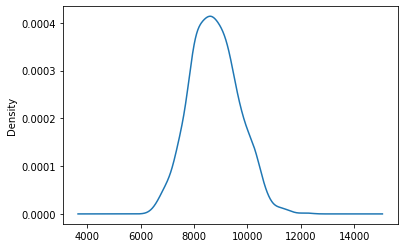

In [32]:
xf = simulate_clt(df1['Purchase'], sample_size=30, trials=1000)

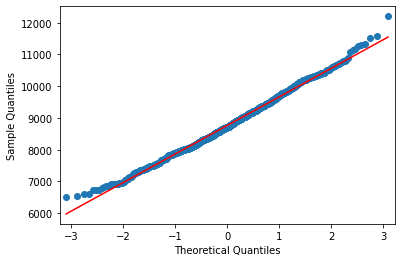

In [33]:
sm.qqplot(xf, dist=stats.norm, line='s');

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

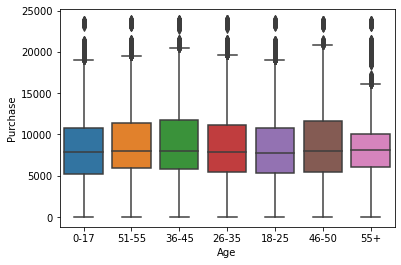

In [34]:
sns.boxplot(data=df1, y='Purchase',x='Age')

we see a lot of outliers in every age range so we have to perform outlier removal

In [35]:
# outlier removal

def remove_outliers(d):
    iqr = d.quantile(0.75) - d.quantile(0.25)
    upper = d.quantile(0.75) + 1.65*iqr
    lower = d.quantile(0.25) - 1.65*iqr
    return d.loc[(d > lower) & (d < upper)]

df1['Purchase'] = remove_outliers(df1['Purchase'].copy())

C:\Users\sudhanshu tomar\AppData\Local\Temp\ipykernel_6048\1614508124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Purchase'] = remove_outliers(df1['Purchase'].copy())


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

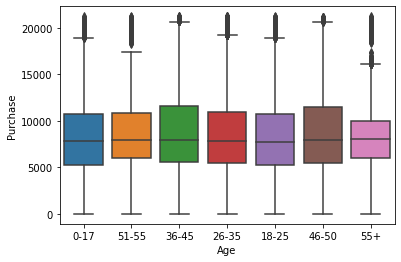

In [36]:
sns.boxplot(data=df1, y='Purchase',x='Age')

So here we have removed most of the outliers and the data range is 

Confidence Interval for female

Case 1: 90% confidence interval

In [37]:
print(confidence_interval(xf,1.65))

[8491, 9034]


Case 2: 95% Confidence interval

In [38]:
print(confidence_interval(xf,1.96))

[8440, 9085]


case 3: 99% confidence interval

In [39]:
print(confidence_interval(xf,2.57))

[8339, 9186]


Case 2: Male

In [40]:
df2=df.loc[df['Gender']=='M']

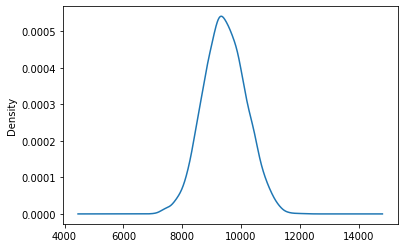

In [41]:
xm = simulate_clt(df2['Purchase'], sample_size=50, trials=5000)

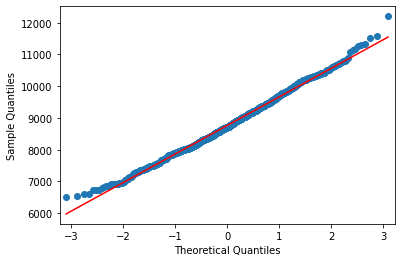

In [42]:
sm.qqplot(xf, dist=stats.norm, line='s');

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

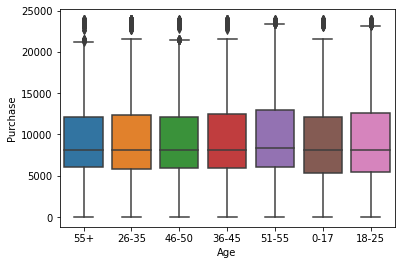

In [43]:
sns.boxplot(data=df2, y='Purchase',x='Age')

In [44]:
# outlier removal

def remove_outliers(d):
    iqr = d.quantile(0.75) - d.quantile(0.25)
    upper = d.quantile(0.75) + 1.65*iqr
    lower = d.quantile(0.25) - 1.65*iqr
    return d.loc[(d > lower) & (d < upper)]

df2['Purchase'] = remove_outliers(df2['Purchase'].copy())

C:\Users\sudhanshu tomar\AppData\Local\Temp\ipykernel_6048\3096759920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Purchase'] = remove_outliers(df2['Purchase'].copy())


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

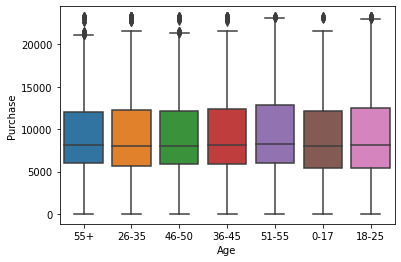

In [45]:
sns.boxplot(data=df2, y='Purchase',x='Age')

Case 1: 90% confidence interval

In [46]:
print(confidence_interval(xm,1.65))

[9228, 9664]


Case 2: 95% Confidence interval

In [47]:
print(confidence_interval(xm,1.96))

[9187, 9705]


case 3: 99% confidence interval

In [48]:
print(confidence_interval(xm,2.57))

[9106, 9785]


In [49]:
dat = [['All', 9013,9563,8961,9614,8860,9716], ['Male',9226,9660,9185,9701,9105,9781], ['Female',8500,9008,8452,9056,8359,9149]]
data=pd.DataFrame(dat, columns=['Categorie','90%-min','90%-max','95%-min','95%-max','99%-min','99%-max'])

In [50]:
data

,Categorie,90%-min,90%-max,95%-min,95%-max,99%-min,99%-max
0,All,9013,9563,8961,9614,8860,9716
1,Male,9226,9660,9185,9701,9105,9781
2,Female,8500,9008,8452,9056,8359,9149


In [51]:
data['ci_90%']=data['90%-max']-data['90%-min']
data['ci_95%']=data['95%-max']-data['95%-min']
data['ci_99%']=data['99%-max']-data['99%-min']
data

,Categorie,90%-min,90%-max,95%-min,95%-max,99%-min,99%-max,ci_90%,ci_95%,ci_99%
0,All,9013,9563,8961,9614,8860,9716,550,653,856
1,Male,9226,9660,9185,9701,9105,9781,434,516,676
2,Female,8500,9008,8452,9056,8359,9149,508,604,790


Confidence interval is shorter for male than female

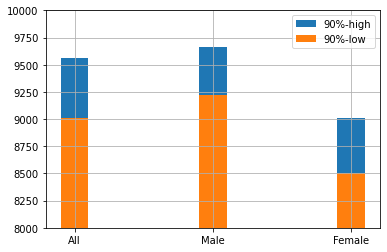

In [52]:
plt.grid()
plt.bar(data['Categorie'], data['90%-max'], width=0.2, label='90%-high')
plt.bar(data['Categorie'], data['90%-min'], width=0.2, label='90%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

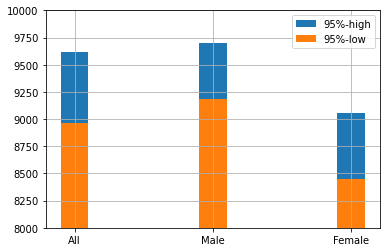

In [53]:
plt.grid()
plt.bar(data['Categorie'], data['95%-max'], width=0.2, label='95%-high')
plt.bar(data['Categorie'], data['95%-min'], width=0.2, label='95%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

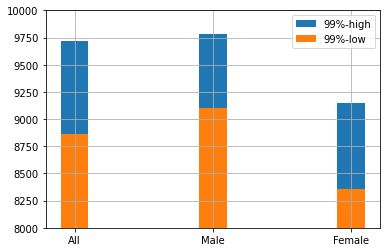

In [54]:
plt.grid()
plt.bar(data['Categorie'], data['99%-max'], width=0.2, label='99%-high')
plt.bar(data['Categorie'], data['99%-min'], width=0.2, label='99%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

Range of confidence interval is lower for female tham male

# Married vs Unmarried analysis

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Married_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(F, 0)"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(F, 0)"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(F, 0)"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(F, 0)"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(M, 0)"


Case 1: for unmarried

In [56]:
df2=df.loc[df['Marital_Status']==0]

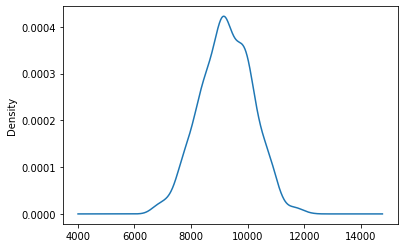

In [57]:
xum = simulate_clt(df2['Purchase'], sample_size=30, trials=1000)

In [58]:
print(confidence_interval(xum,1.65))

[8968, 9522]


In [59]:
print(confidence_interval(xum,1.96))

[8916, 9574]


In [60]:
print(confidence_interval(xum,2.57))

[8813, 9677]


Case 2: for Married

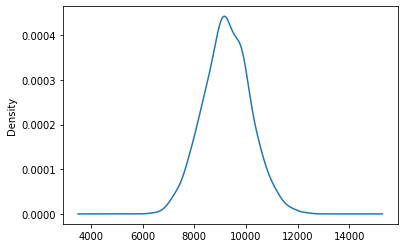

In [61]:
df2=df.loc[df['Marital_Status']==1]
xm = simulate_clt(df2['Purchase'], sample_size=30, trials=1000)

In [62]:
print(confidence_interval(xm,1.65))

[8987, 9532]


In [63]:
print(confidence_interval(xm,1.96))

[8936, 9583]


In [64]:
print(confidence_interval(xm,2.57))

[8835, 9684]


In [65]:
dat=[['Unmarried',8966, 9534,8966, 9534, 8807, 9692],['Married',9006,9539,8956,9589,8857,9687]]
data=pd.DataFrame(dat, columns=['Categorie','90%-min','90%-max','95%-min','95%-max','99%-min','99%-max'])

In [66]:
data['ci_90%']=data['90%-max']-data['90%-min']
data['ci_95%']=data['95%-max']-data['95%-min']
data['ci_99%']=data['99%-max']-data['99%-min']
data

,Categorie,90%-min,90%-max,95%-min,95%-max,99%-min,99%-max,ci_90%,ci_95%,ci_99%
0,Unmarried,8966,9534,8966,9534,8807,9692,568,568,885
1,Married,9006,9539,8956,9589,8857,9687,533,633,830


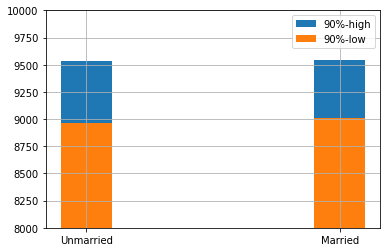

In [67]:
plt.grid()
plt.bar(data['Categorie'], data['90%-max'], width=0.2, label='90%-high')
plt.bar(data['Categorie'], data['90%-min'], width=0.2, label='90%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

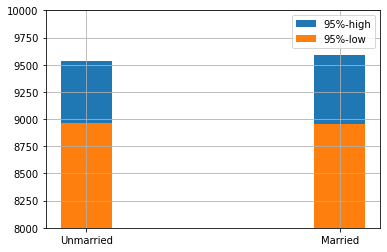

In [68]:
plt.grid()
plt.bar(data['Categorie'], data['95%-max'], width=0.2, label='95%-high')
plt.bar(data['Categorie'], data['95%-min'], width=0.2, label='95%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

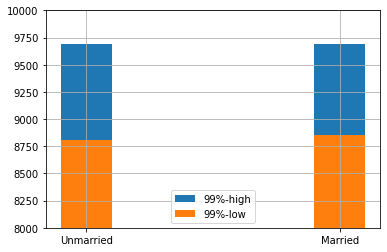

In [69]:
plt.grid()
plt.bar(data['Categorie'], data['99%-max'], width=0.2, label='99%-high')
plt.bar(data['Categorie'], data['99%-min'], width=0.2, label='99%-low')
plt.ylim(8000,10000)
plt.legend()
plt.show()

All the confidence interval ranges for married vs unmarried are approximately equal

Insights:
* People of age group 26-35 are more active in black friday sale than other age group.
* Males in age group 26-35 are more active than female in black friday sales
* Males of age group 18-25 and 36 to 45 are more active than female of age group 26-35
* There are mostly unmarried people who dominate the sales in age range from 18 to 45
* Above the age of 45 mostly married people dominate the sales.
* The order of sales is:
    unmarried male > married male > unmarried female > married female
* The product 1, 5 and 8 are most demanded product
* Mostly people who buy product 1,5 and 8 belongs to age range 26 to 35.
* Most of the transactions are made from city B that too is from the people who are employed in occupation category 0 4 and 7 are dominant
* people who are living in city for one year are doing more shopping than others

Recommendations:
* Majority of shopping are done by people of age group 18 to 45, so more foucs should be on this age group.
* Product 1, 5 and 8 are most demanded so enough quantity should be kept in stock of these products.
* City B have more sales so, stock should be maintained there.
* Targetting people who are living in city for a long time for shopping by attractive offers.
* Female can be encoureged for shopping by giving them some discounts so that they may come at par with males.